### Load  libraries

In [1]:
# data manipulation and analysis libraries
import numpy as np 
import pandas as pd 

# graphics libraries
import seaborn as sns 
import matplotlib.pyplot as plt

# split data
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve

### Load processed data

In [2]:
df = pd.read_csv(
    "C:\\Users\\Kotula\\Desktop\\QU\\Processed_data\\processed_data.csv",
    low_memory=False
)

In [3]:
# let's see data shape
df.shape

(1230261, 68)

In [4]:
# few firest line of data 
df.head().transpose()

,0,1,2,3,4
loan_amnt,3600.00,24700.00,10400.00,11950.00,20000.000000
term_in_months,36.00,36.00,60.00,36.00,36.000000
int_rate,13.99,11.99,22.45,13.44,9.170000
installment,123.03,820.28,289.91,405.18,637.580000
annual_inc,55000.00,65000.00,104433.00,34000.00,78253.453814
...,...,...,...,...,...
purpose_small_business,0.00,1.00,0.00,0.00,0.000000
purpose_vacation,0.00,0.00,0.00,0.00,0.000000
purpose_wedding,0.00,0.00,0.00,0.00,0.000000
initial_list_status_w,1.00,1.00,1.00,1.00,0.000000


### Split data
split data into trai and test sets.

In [5]:
# features without target
X = df.drop('loan_status', axis=1)
# target feature
y = df['loan_status']

In [6]:
# lets see X and y shape
print('X:', X.shape)
print('y:', y.shape)
#number of 0/1 in data
print(y.value_counts(dropna = False))

X: (1230261, 67)
y: (1230261,)
0    964055
1    266206
Name: loan_status, dtype: int64


### Undersampling

In [7]:
# load library to undersampling
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [8]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [9]:
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
print(y_over.value_counts(dropna = False))

1    266206
0    266206
Name: loan_status, dtype: int64


Now both classes have the same number of observations.

In [10]:
# split data into train:test sets in proportion 85:15 %  
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.15) 

### Scaling data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
#define scaler 
scaler = MinMaxScaler()
# use scaler on train and test df
df.describe( include= ["float"]).columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [13]:
# import warnings filter
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action="ignore", category=ConvergenceWarning)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

LogisticRegression()

In [16]:
train_pred_1 = model_1.predict(X_train)
test_pred_1 = model_1.predict(X_test)

In [17]:
print('Logistic Regression Train:\n', classification_report(y_train,train_pred_1))
print('Logistic Regression Test:\n', classification_report(y_test,test_pred_1))

Logistic Regression Train:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64    226082
           1       0.64      0.68      0.66    226468

    accuracy                           0.65    452550
   macro avg       0.65      0.65      0.65    452550
weighted avg       0.65      0.65      0.65    452550

Logistic Regression Test:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64     40124
           1       0.64      0.68      0.66     39738

    accuracy                           0.65     79862
   macro avg       0.65      0.65      0.65     79862
weighted avg       0.65      0.65      0.65     79862



In [18]:
scores_dict = {
    'LogReg': {
        'Train': roc_auc_score(y_train, model_1.predict(X_train)),
        'Test': roc_auc_score(y_test, model_1.predict(X_test)),
    },
}

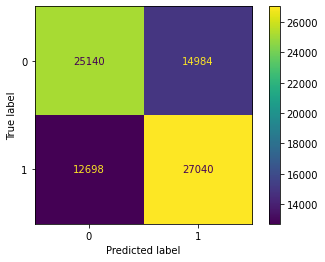

In [19]:
plot_confusion_matrix(model_1, X_test,y_test)

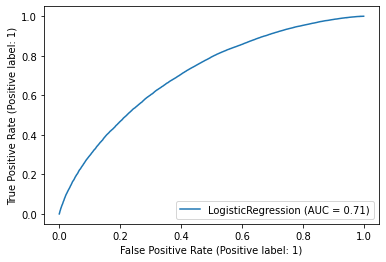

In [20]:
plot_roc_curve(model_1, X_test, y_test)

### Logistic Regression with predictor importance

Feature: 0, Score: 0.29649
Feature: 1, Score: 0.46613
Feature: 2, Score: -0.14764
Feature: 3, Score: 0.23765
Feature: 4, Score: -0.25265
Feature: 5, Score: 0.71811
Feature: 6, Score: 0.62458
Feature: 7, Score: 0.14158
Feature: 8, Score: -0.39674
Feature: 9, Score: 0.09768
Feature: 10, Score: -0.44211
Feature: 11, Score: -0.17543
Feature: 12, Score: -0.06011
Feature: 13, Score: 0.25132
Feature: 14, Score: 0.41108
Feature: 15, Score: 0.62177
Feature: 16, Score: 0.78087
Feature: 17, Score: 1.02720
Feature: 18, Score: 1.09704
Feature: 19, Score: 1.22594
Feature: 20, Score: 1.37280
Feature: 21, Score: 1.51463
Feature: 22, Score: 1.62334
Feature: 23, Score: 1.69349
Feature: 24, Score: 1.77063
Feature: 25, Score: 1.89623
Feature: 26, Score: 1.93234
Feature: 27, Score: 2.00190
Feature: 28, Score: 2.11721
Feature: 29, Score: 2.16598
Feature: 30, Score: 2.15887
Feature: 31, Score: 2.23292
Feature: 32, Score: 2.25426
Feature: 33, Score: 2.34129
Feature: 34, Score: 2.33874
Feature: 35, Score: 2.33

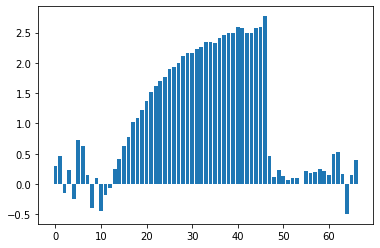

In [21]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

model_2 = LogisticRegression()
model_2.fit(X_train,y_train)

# get importance
importance = model_2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [22]:
# configure to select a subset of features
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [23]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [24]:
model_2 = LogisticRegression()
model_2.fit(X_train_fs, y_train)

LogisticRegression()

In [25]:
train_pred_2 = model_2.predict(X_train_fs)
test_pred_2 = model_2.predict(X_test_fs)

In [26]:
print('Logistic Regression F.importance Train:\n', classification_report(y_train,train_pred_2))
print('Logistic Regression F.importanceTest:\n', classification_report(y_test,test_pred_2))

Logistic Regression F.importance Train:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65    226082
           1       0.65      0.62      0.63    226468

    accuracy                           0.64    452550
   macro avg       0.64      0.64      0.64    452550
weighted avg       0.64      0.64      0.64    452550

Logistic Regression F.importanceTest:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65     40124
           1       0.65      0.62      0.63     39738

    accuracy                           0.64     79862
   macro avg       0.64      0.64      0.64     79862
weighted avg       0.64      0.64      0.64     79862



In [27]:
scores_dict = {
    'LogReg FImp': {
        'Train': roc_auc_score(y_train, model_2.predict(X_train_fs)),
        'Test': roc_auc_score(y_test, model_2.predict(X_test_fs)),
    },
}

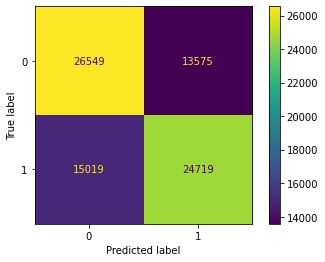

In [28]:
plot_confusion_matrix(model_2, X_test_fs,y_test)

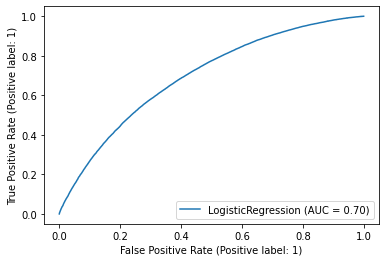

In [29]:
plot_roc_curve(model_2, X_test_fs, y_test)

### Logistic Regression with stepwise feature selection

In [30]:
from sklearn.feature_selection import RFECV

In [31]:
estimator = LogisticRegression()
model_3 = RFECV(estimator, step=1, cv=7)

In [32]:
model_3.fit(X_train,y_train)

RFECV(cv=7, estimator=LogisticRegression())

In [33]:
train_pred_3 = model_3.predict(X_train)
test_pred_3 = model_3.predict(X_test)

In [34]:
print('Logistic Regression StepW:\n', classification_report(y_train,train_pred_3))
print('Logistic Regression StepW:\n', classification_report(y_test,test_pred_3))

Logistic Regression StepW:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64    226082
           1       0.64      0.68      0.66    226468

    accuracy                           0.65    452550
   macro avg       0.65      0.65      0.65    452550
weighted avg       0.65      0.65      0.65    452550

Logistic Regression StepW:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64     40124
           1       0.64      0.68      0.66     39738

    accuracy                           0.65     79862
   macro avg       0.65      0.65      0.65     79862
weighted avg       0.65      0.65      0.65     79862



In [35]:
scores_dict = {
    'LogReg StepW': {
        'Train': roc_auc_score(y_train, model_3.predict(X_train)),
        'Test': roc_auc_score(y_test, model_3.predict(X_test)),
    },
}

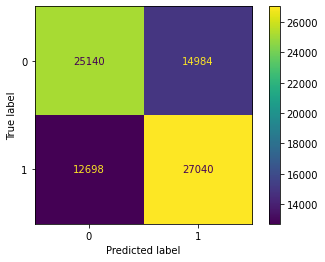

In [36]:
plot_confusion_matrix(model_3, X_test,y_test)

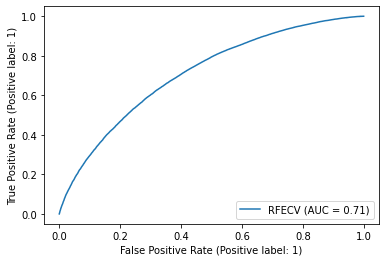

In [37]:
plot_roc_curve(model_3, X_test, y_test)

### XGBoost

In [38]:
from xgboost import XGBClassifier

In [39]:
model_4 = XGBClassifier()

# train the model on the data
model_4.fit(X_train, y_train)

C:\Users\Kotula\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
train_pred_4 = model_4.predict(X_train)
test_pred_4 = model_4.predict(X_test)

In [41]:
print('XGBoost Train:\n', classification_report(y_train,train_pred_4))
print('XGBoost Test:\n', classification_report(y_test,test_pred_4))

XGBoost Train:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67    226082
           1       0.67      0.70      0.69    226468

    accuracy                           0.68    452550
   macro avg       0.68      0.68      0.68    452550
weighted avg       0.68      0.68      0.68    452550

XGBoost Test:
               precision    recall  f1-score   support

           0       0.67      0.64      0.66     40124
           1       0.65      0.68      0.67     39738

    accuracy                           0.66     79862
   macro avg       0.66      0.66      0.66     79862
weighted avg       0.66      0.66      0.66     79862



In [42]:
scores_dict = {
    'XGBoost': {
        'Train': roc_auc_score(y_train, model_4.predict(X_train)),
        'Test': roc_auc_score(y_test, model_4.predict(X_test)),
    },
}

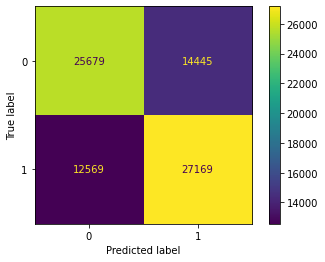

In [43]:
plot_confusion_matrix(model_4, X_test,y_test)

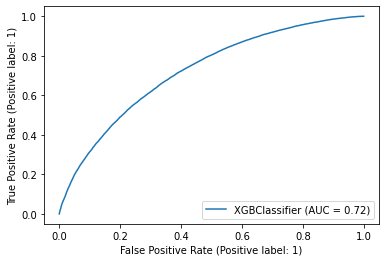

In [44]:
plot_roc_curve(model_4, X_test, y_test)

### XGBoost with hyperparameter tuning
Hyperparameter

In [45]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

I will use hyperparameter optimization by RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [47]:
classifier_XGB = XGBClassifier()

In [48]:
random_search = RandomizedSearchCV(classifier_XGB,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [49]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Kotula\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [50]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [68]:
#Building final classifier model
model_5 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [69]:
# train the model on the data
model_5.fit(X_train, y_train)

C:\Users\Kotula\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [70]:
train_pred_5 = model_5.predict(X_train)
test_pred_5 = model_5.predict(X_test)

In [71]:
print('XGBoost hip Train:\n', classification_report(y_train,train_pred_5))
print('XGBoost hip Train:\n', classification_report(y_test,test_pred_5))

XGBoost hip Train:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78    226082
           1       0.78      0.80      0.79    226468

    accuracy                           0.78    452550
   macro avg       0.78      0.78      0.78    452550
weighted avg       0.78      0.78      0.78    452550

XGBoost hip Train:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65     40124
           1       0.64      0.66      0.65     39738

    accuracy                           0.65     79862
   macro avg       0.65      0.65      0.65     79862
weighted avg       0.65      0.65      0.65     79862



In [72]:
scores_dict = {
    'XGBoost_hip': {
        'Train': roc_auc_score(y_train, model_5.predict(X_train)),
        'Test': roc_auc_score(y_test, model_5.predict(X_test)),
    },
}

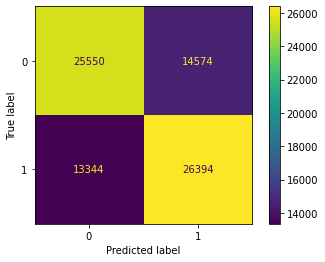

In [73]:
plot_confusion_matrix(model_5, X_test,y_test)

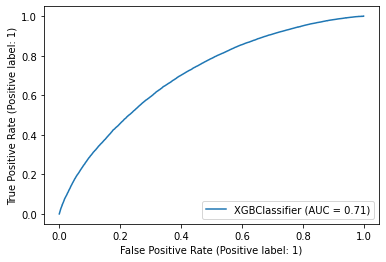

In [74]:
plot_roc_curve(model_5, X_test, y_test)

### Decision Tree Classifier
with pruning [Scikit learn](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [76]:
model_6 = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=15)
model_6.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=100)

In [77]:
train_pred_6 = model_6.predict(X_train)
test_pred_6 = model_6.predict(X_test)

In [78]:
print('Decision Tree Train:\n', classification_report(y_train,train_pred_6))
print('Decision Tree Train:\n', classification_report(y_test,test_pred_6))

Decision Tree Train:
               precision    recall  f1-score   support

           0       0.65      0.62      0.63    226082
           1       0.64      0.67      0.65    226468

    accuracy                           0.64    452550
   macro avg       0.64      0.64      0.64    452550
weighted avg       0.64      0.64      0.64    452550

Decision Tree Train:
               precision    recall  f1-score   support

           0       0.65      0.62      0.64     40124
           1       0.64      0.67      0.65     39738

    accuracy                           0.64     79862
   macro avg       0.64      0.64      0.64     79862
weighted avg       0.64      0.64      0.64     79862



In [79]:
scores_dict = {
    'Decision Tree': {
        'Train': roc_auc_score(y_train, model_6.predict(X_train)),
        'Test': roc_auc_score(y_test, model_6.predict(X_test)),
    },
}

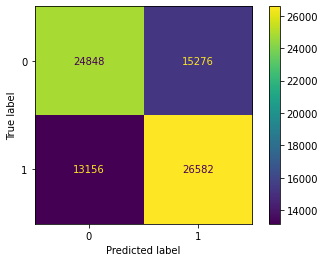

In [80]:
plot_confusion_matrix(model_6, X_test,y_test)

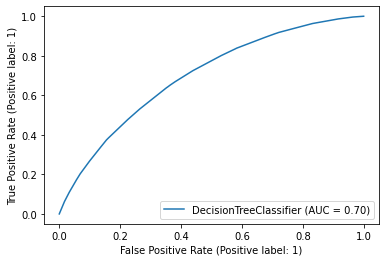

In [81]:
plot_roc_curve(model_6, X_test, y_test)

#### Visualizing decision tree

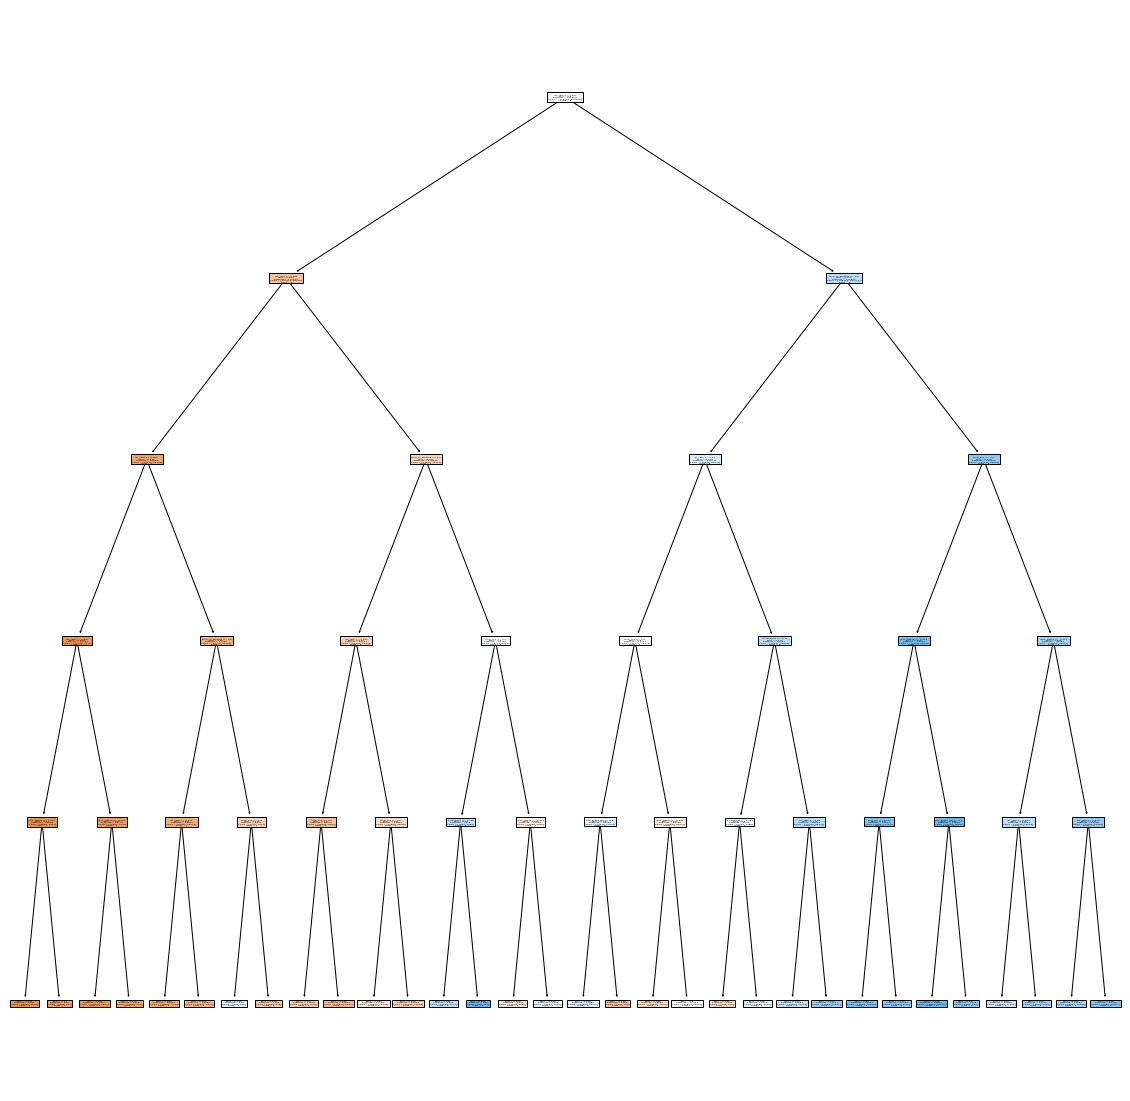

In [82]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ["1","0"]
tree.plot_tree(model_6,feature_names=features,class_names=classes,filled=True)
plt.show()

In [83]:
ml_models = {
    'LogReg': model_1,
    'LogReg StepW': model_3,
    'XGBoost': model_4, 
    'XGBoost_hip': model_5, 
    'Decision Tree': model_6
}

for model in ml_models:
    print(f"{model.upper():{10}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")
    
print(f"LOGREG FIMP roc_auc_score: {roc_auc_score(y_test, model_2.predict(X_test_fs)):.3f}")

LOGREG     roc_auc_score: 0.654
LOGREG STEPW roc_auc_score: 0.654
XGBOOST    roc_auc_score: 0.662
XGBOOST_HIP roc_auc_score: 0.650
DECISION TREE roc_auc_score: 0.644
LOGREG FIMP roc_auc_score: 0.642
